In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib.patches import Polygon

######################################################
# pandas df_updownを読み込み
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
df_updown = pd.read_csv(updown_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')
df_updown.head(10)

,index,flag,rate,wup,pop,ava,mpcy,potential,region,country,cityname,12region
0,1,False,0.863325,36859.626,31821850.0,1.379555e+10,433.524552,93.0,eastern asia,Japan,Tokyo,East Asia
1,2,False,1.003201,21987.895,22058268.0,3.580540e+09,162.321909,39.0,southern asia,India,Delhi,South Asia
2,3,False,0.715760,20314.309,14540163.0,1.369470e+10,941.852951,17.0,eastern asia,China,Shanghai,East Asia
3,4,False,1.002057,20136.681,20178100.0,3.006577e+08,14.900200,43.0,central america,Mexico,Ciudad de México (Mexico City),Central America
4,5,False,0.492121,19659.808,9675000.0,2.057520e+09,212.663566,11.0,south america,Brazil,São Paulo,South America
5,6,False,0.489232,19312.646,9448362.0,1.272031e+10,1346.297983,24.0,eastern asia,Japan,Kinki M.M.A. (Osaka),East Asia
6,7,False,0.470956,18365.262,8649229.0,6.329261e+08,73.177170,17.0,northern america,United States of America,New York-Newark,North America
7,8,False,0.783200,18257.413,14299211.0,9.254411e+09,647.197295,12.0,southern asia,India,Mumbai (Bombay),South Asia
8,9,False,1.006426,16899.015,17007614.0,7.059309e+11,41506.758087,24.0,northern africa,Egypt,Al-Qahirah (Cairo),Northern Africa
9,10,False,0.823952,16441.252,13546804.0,1.971522e+09,145.534081,24.0,eastern asia,China,Beijing,East Asia


In [4]:
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
df_updown = pd.read_csv(potential_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
df_updown.head(10)

,index,flag,rate,wup,pop,ava,mpcy,potential,region,country,cityname,12region
0,1,False,0.8633253630951112,36859.626,31821850.0,13795553280.0,433.524552469451,9491682304.0,eastern asia,Japan,Tokyo,East Asia
1,2,False,1.0032005337482284,21987.895,22058268.0,4002339072.0,181.4439407482038,3230178816.0,southern asia,India,Delhi,South Asia
2,3,False,0.715759664776193,20314.309,14540163.0,14700439552.0,1011.0230230568942,10815181824.0,eastern asia,China,Shanghai,East Asia
3,4,False,1.0020568930897795,20136.681,20178100.0,300657725.859375,14.90020001186311,43.0,central america,Mexico,Ciudad de México (Mexico City),Central America
4,5,False,0.4921207775782957,19659.808,9675000.0,2057520000.0,212.66356589147287,2057520000.0,south america,Brazil,São Paulo,South America
5,6,False,0.4892318742858954,19312.646,9448362.0,12720310699.5,1346.2979826026988,12720310699.5,eastern asia,Japan,Kinki M.M.A. (Osaka),East Asia
6,7,False,0.4709559275549676,18365.262,8649229.0,632926103.34375,73.1771702823165,632926103.34375,northern america,United States of America,New York-Newark,North America
7,8,False,0.7832002814418451,18257.413,14299211.0,9254410677.0,647.1972948017901,9254410677.0,southern asia,India,Mumbai (Bombay),South Asia
8,9,False,1.006426350884948,16899.015,17007614.0,707711401984.0,41611.4454375552,34572365824.0,northern africa,Egypt,Al-Qahirah (Cairo),Northern Africa
9,10,False,0.8239520931860906,16441.252,13546804.0,1971521664.0,145.53408051079796,1971521664.0,eastern asia,China,Beijing,East Asia


In [28]:
import matplotlib.patches as mpatches
from matplotlib.path import Path

######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
potential_path = f'{h08dir}/wsi/dat/potential/updown_potential.txt'
load_path = potential_path

df_updown = pd.read_csv(load_path, delimiter='|', header=None)
df_updown.columns = df_updown.iloc[0]
df_updown = df_updown[1:].reset_index(drop=True)
df_updown = df_updown.infer_objects()
float_lst = ['rate', 'wup', 'pop', 'ava', 'mpcy', 'potential']
for col in float_lst:
    df_updown[col] = pd.to_numeric(df_updown[col], errors='coerce')

# total population
region_counts = df_updown['12region'].value_counts()
pop_sum = df_updown.groupby('12region')['pop'].sum().reset_index()
estimated_sorted = pop_sum.sort_values(by='pop', ascending=False)
print(estimated_sorted)
total_population_2010 =df_updown['pop'].sum()
print(f"全都市の合計人口 (person): {total_population_2010}")

region_lst = ['Central America', 
              'East Asia', 
              'Middle East', 
              'Northern Africa', 
              'Southeast Asia', 
              'North America', 
              'Southern Africa', 
              'South America', 
              'West Europe', 
              'Eastern Europe & Central Asia', 
              'Australia/Pacific', 
              'South Asia']

                         12region           pop
2                       East Asia  5.315165e+08
8                      South Asia  2.753774e+08
7                   South America  1.549972e+08
5                   North America  1.447201e+08
11                    West Europe  1.359223e+08
10                Southern Africa  1.342213e+08
9                  Southeast Asia  9.968082e+07
3   Eastern Europe & Central Asia  9.282768e+07
4                     Middle East  8.969898e+07
1                 Central America  8.524293e+07
6                 Northern Africa  4.538879e+07
0               Australia/Pacific  1.441377e+07
全都市の合計人口 (person): 1804007889.578125


In [27]:
# stressed population
irrigation_df = df_updown[df_updown['mpcy'] < 1000]
irrigation_pop = irrigation_df.groupby('12region')['pop'].sum().reset_index()
irrigation_sorted = irrigation_pop.sort_values(by='pop', ascending=False)
print(irrigation_sorted)
total_pop_irrigation =irrigation_pop['pop'].sum()
print(f"全都市の合計人口 (person): {total_pop_irrigation}")

                         12region           pop
2                       East Asia  2.996921e+08
8                      South Asia  1.825449e+08
7                   South America  1.084275e+08
10                Southern Africa  9.256822e+07
5                   North America  7.824450e+07
11                    West Europe  7.747021e+07
4                     Middle East  7.433562e+07
1                 Central America  6.850254e+07
9                  Southeast Asia  6.072287e+07
3   Eastern Europe & Central Asia  3.870439e+07
6                 Northern Africa  2.231212e+07
0               Australia/Pacific  8.034718e+06
全都市の合計人口 (person): 1111559696.375


In [7]:
# domestic priority
domestic_df = df_updown[df_updown['mpcy'] < 100]
domestic_pop = domestic_df.groupby('12region')['pop'].sum().reset_index()
domestic_sorted = domestic_pop.sort_values(by='pop', ascending=False)
print(domestic_sorted)
total_pop_domestic =domestic_pop['pop'].sum()
print(f"全都市の合計人口 (person): {total_pop_domestic}")

                         12region           pop
2                       East Asia  1.380547e+08
8                      South Asia  8.478074e+07
4                     Middle East  6.414253e+07
7                   South America  5.581143e+07
10                Southern Africa  5.235332e+07
1                 Central America  4.741485e+07
5                   North America  3.885751e+07
11                    West Europe  3.091037e+07
9                  Southeast Asia  2.748488e+07
3   Eastern Europe & Central Asia  1.561104e+07
6                 Northern Africa  1.377621e+07
0               Australia/Pacific  2.735970e+06
全都市の合計人口 (person): 571933513.953125


In [8]:
# industry priority
industry_df = df_updown[df_updown['mpcy'] < 300]
industry_pop = industry_df.groupby('12region')['pop'].sum().reset_index()
industry_sorted = industry_pop.sort_values(by='pop', ascending=False)
print(industry_sorted)
total_pop_industry =industry_pop['pop'].sum()
print(f"全都市の合計人口 (person): {total_pop_industry}")

                         12region           pop
2                       East Asia  2.111252e+08
8                      South Asia  1.416938e+08
7                   South America  8.957052e+07
10                Southern Africa  7.955083e+07
4                     Middle East  7.095659e+07
1                 Central America  6.131127e+07
5                   North America  5.643337e+07
11                    West Europe  5.499297e+07
9                  Southeast Asia  3.730878e+07
3   Eastern Europe & Central Asia  3.222695e+07
6                 Northern Africa  1.851217e+07
0               Australia/Pacific  3.137675e+06
全都市の合計人口 (person): 856820059.5


In [10]:
# erf priority
erf_df = df_updown[df_updown['mpcy'] < 1700]
erf_pop = erf_df.groupby('12region')['pop'].sum().reset_index()
erf_sorted = erf_pop.sort_values(by='pop', ascending=False)
print(erf_sorted)
total_pop_erf =erf_pop['pop'].sum()
print(f"全都市の合計人口 (person): {total_pop_erf}")

                         12region           pop
2                       East Asia  3.421659e+08
8                      South Asia  1.948812e+08
7                   South America  1.155007e+08
10                Southern Africa  9.685164e+07
11                    West Europe  9.603918e+07
5                   North America  8.478568e+07
4                     Middle East  7.699786e+07
1                 Central America  7.112791e+07
9                  Southeast Asia  6.776549e+07
3   Eastern Europe & Central Asia  4.419199e+07
6                 Northern Africa  2.348697e+07
0               Australia/Pacific  9.817482e+06
全都市の合計人口 (person): 1223612060.28125


In [30]:
non_stressed = total_population_2010 - total_pop_irrigation
print(non_stressed)

692448193.203125


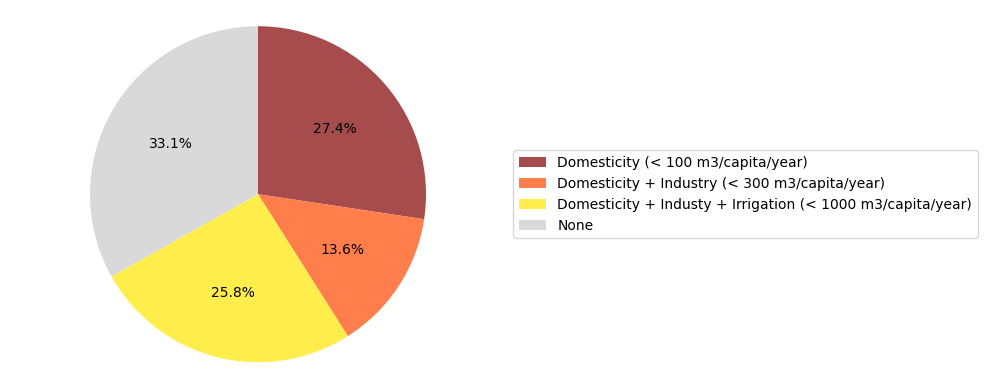

In [58]:
import matplotlib.pyplot as plt

# データの準備
dom_only = total_pop_domestic
ind_only = total_pop_industry - total_pop_domestic
irg_only = total_pop_irrigation - total_pop_domestic
sizes = [dom_only, 
         ind_only, 
         irg_only, 
         non_stressed]
labels = ['Domesticity (< 100 m3/capita/year)', 
          'Domesticity + Industry (< 300 m3/capita/year)', 
          'Domesticity + Industy + Irrigation (< 1000 m3/capita/year)', 
          'None']
colors = ['#a64c4c', 
          '#ff7e4c', 
          '#ffed4c', 
          '#d9d9d9']
explode = (0.1, 0, 0, 0)  # 「A」部分を少し引き離す

# 円グラフの作成
#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
#        shadow=False, startangle=90, counterclock=False)
plt.pie(sizes, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90, counterclock=False)

# 円グラフの軸を等しくする（円を真円にするため）
plt.axis('equal')
#plt.legend(labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)
#plt.legend(labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

# グラフの表示
plt.show()

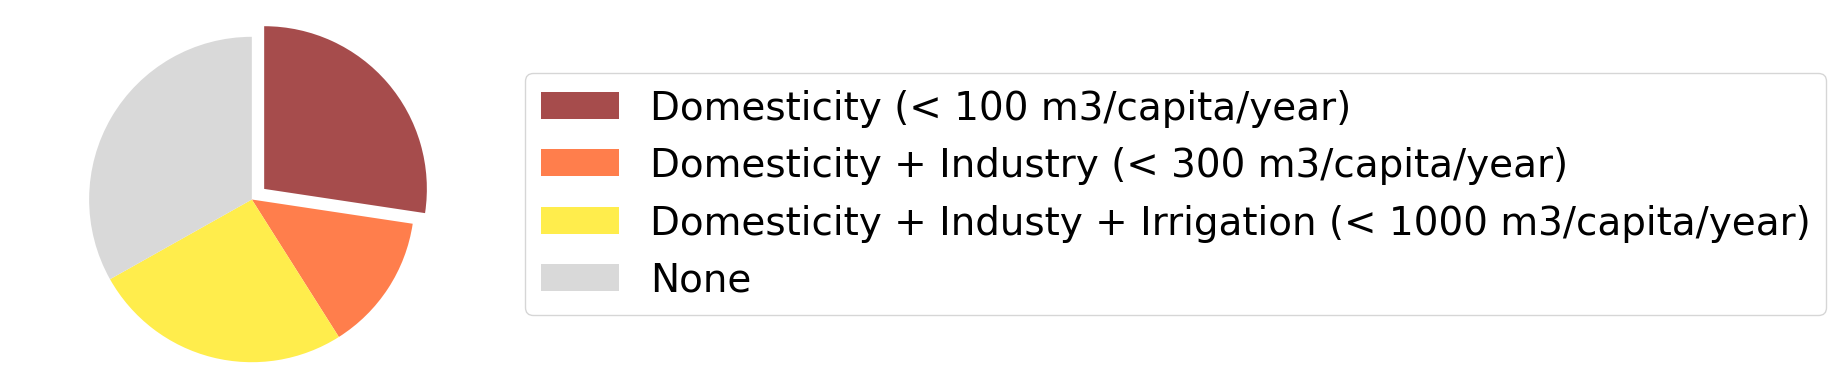

[571.933513953125, 284.886545546875, 539.626182421875, 692.448193203125]


In [60]:
import matplotlib.pyplot as plt

# データの準備
dom_only = total_pop_domestic
ind_only = total_pop_industry - total_pop_domestic
irg_only = total_pop_irrigation - total_pop_domestic
sizes = [dom_only, 
         ind_only, 
         irg_only, 
         non_stressed]
labels = ['Domesticity (< 100 m3/capita/year)', 
          'Domesticity + Industry (< 300 m3/capita/year)', 
          'Domesticity + Industy + Irrigation (< 1000 m3/capita/year)', 
          'None']
colors = ['#a64c4c', 
          '#ff7e4c', 
          '#ffed4c', 
          '#d9d9d9']
explode = (0.1, 0, 0, 0)  # 「A」部分を少し引き離す

# 円グラフの作成
plt.pie(sizes, colors=colors, explode=explode, 
        shadow=False, startangle=90, counterclock=False)

# 円グラフの軸を等しくする（円を真円にするため）
plt.axis('equal')
#plt.legend(labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)
#plt.legend(labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=28)

# グラフの表示
plt.show()
print([s/1e6 for s in sizes])